In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [ ]:
#Target = Delinquency + ten Features

In [2]:
#1. DRBLACBS : Delinquency Rate on Commercial and Industrial Loans, All Commercial Banks, Percent, Quarterly, Seasonally Adjusted.
#2. DEXUSEU : U.S. / Euro Foreign Exchange Rate, U.S. Dollars to One Euro, Quarterly, Not Seasonally Adjusted.
#3. FEDFUNDS : Effective Federal Funds Rate, Percent, Quarterly, Not Seasonally Adjusted.
#4. RETAILSMSA : Retailers Sales, Millions of Dollars, Quarterly, Seasonally Adjusted.
#5. INDPRO : Industrial Production Index, Index 2012=100, Quarterly, Seasonally Adjusted.
#6. GDP : Real Gross Domestic Product, Percent Change from Preceding Period, Quarterly, Seasonally Adjusted Annual Rate.
#7. HOUST : Housing Starts: Total: New Privately Owned Housing Units Started, Thousands of Units, Quarterly, Seasonally Adjusted Annual Rate.
#8. CMRMTSPL : Real Manufacturing and Trade Industries Sales, Millions of Chained 2012 Dollars, Quarterly, Seasonally Adjusted.
#9. CPIAUCSL : Consumer Price Index for All Urban Consumers: All Items in U.S. City Average, Index 1982-1984=100, Quarterly, Seasonally Adjusted.
#10. PAYEMS : All Employees, Total Nonfarm, Thousands of Persons, Quarterly, Seasonally Adjusted.
#11. DGS10 : 10-Year Treasury Constant Maturity Rate, Percent, Quarterly, Not Seasonally Adjusted.

In [3]:
import pandas as pd
from pandas import read_csv
#load Data
dataset = read_csv("C:/Users/Gandy Family/Documents/Models/Economic Data.csv",parse_dates=['Date'], index_col='Date', header=0, encoding = 'unicode_escape')
#dataset.columns = ['DRBLACBS','DEXUSEU','FEDFUNDS','RETAILSMSA','INDPRO','GDP','HOUST','CMRMTSPL','CPIAUCSL','PAYEMS','DGS10']
#dataset.index.name = 'Date'
#Summarize First 5 rows
print(dataset.head(5))
print(dataset.shape)

            DRBLACBS  DEXUSEU  FEDFUNDS  RETAILSMSA   INDPRO  GDP  HOUST  \
Date                                                                       
1999-01-01      1.97   1.1204      4.73      225888  90.2266  3.8   1709   
1999-04-01      2.00   1.0567      4.75      230725  91.0929  3.1   1574   
1999-07-01      2.06   1.0493      5.09      235998  91.9045  5.3   1651   
1999-10-01      1.99   1.0368      5.31      241194  93.5314  7.0   1655   
2000-01-01      2.11   0.9859      5.68      246798  94.4765  1.5   1659   

               CMRMTSPL  CPIAUCSL  PAYEMS  DGS10  
Date                                              
1999-01-01  1072882.333   164.733  128016   5.00  
1999-04-01  1086392.667   165.967  128831   5.54  
1999-07-01  1098903.333   167.200  129585   5.88  
1999-10-01  1115554.333   168.433  130472   6.14  
2000-01-01  1120433.667   170.100  131242   6.47  
(84, 11)


In [4]:
dataset.describe()

,DRBLACBS,DEXUSEU,FEDFUNDS,RETAILSMSA,INDPRO,GDP,HOUST,CMRMTSPL,CPIAUCSL,PAYEMS,DGS10
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,8.400000e+01,84.000000,84.000000,84.000000
mean,1.955714,1.202467,1.935714,335188.750000,99.287698,2.178571,1284.130952,1.271517e+06,213.033143,136534.964286,3.537262
std,1.007395,0.164901,1.995843,63827.768318,5.771824,2.339657,462.202579,1.259886e+05,27.043472,6424.219055,1.294183
min,0.730000,0.868200,0.070000,225888.000000,87.598400,-8.400000,526.000000,1.072882e+06,164.733000,128016.000000,1.560000
25%,1.180000,1.106050,0.160000,284338.500000,94.374425,1.250000,948.250000,1.155560e+06,187.800250,131229.750000,2.362500
50%,1.600000,1.212150,1.250000,330092.000000,99.911300,2.300000,1243.500000,1.267166e+06,216.284000,134657.000000,3.475000
75%,2.547500,1.319750,3.250000,387707.500000,103.747500,3.500000,1656.000000,1.367978e+06,236.876000,139498.000000,4.585000
max,4.390000,1.562500,6.520000,462053.000000,110.324900,7.500000,2120.000000,1.522049e+06,257.832000,151788.000000,6.470000


In [5]:
dataset.isnull().sum() #Missing Values

DRBLACBS      0
DEXUSEU       0
FEDFUNDS      0
RETAILSMSA    0
INDPRO        0
GDP           0
HOUST         0
CMRMTSPL      0
CPIAUCSL      0
PAYEMS        0
DGS10         0
dtype: int64

In [6]:
#Time Series Visualization

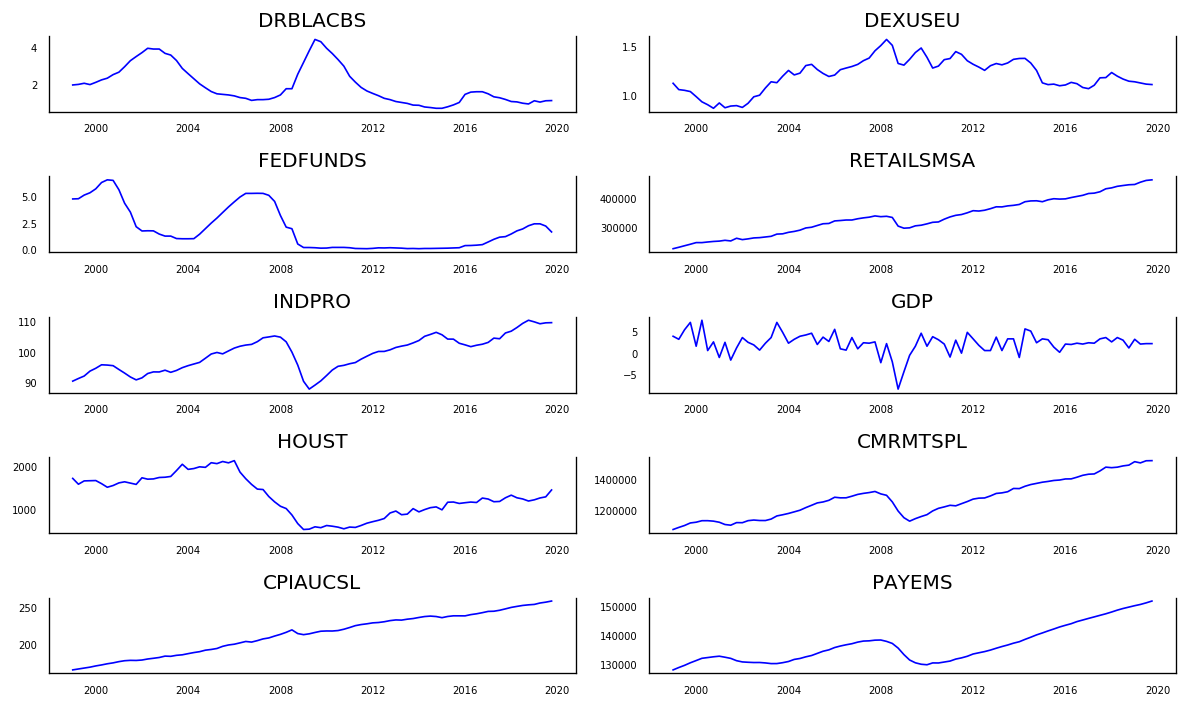

In [7]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = dataset[dataset.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
# Decorations
    ax.set_title(dataset.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout();

In [ ]:
#Each of the series has similar trend.  Resonding to to the crash of 2008,  only series that shows stationarity is GDP

In [8]:
#Testing Causation using Granger’s Causality Test

In [9]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=5
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            dataset.loc[r, c] = min_p_value
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset

grangers_causation_matrix(dataset, variables = dataset.columns)

,DRBLACBS_x,DEXUSEU_x,FEDFUNDS_x,RETAILSMSA_x,INDPRO_x,GDP_x,HOUST_x,CMRMTSPL_x,CPIAUCSL_x,PAYEMS_x,DGS10_x
DRBLACBS_y,1.0000,0.0114,0.0000,0.0000,0.0000,0.0000,0.1312,0.0000,0.0000,0.0000,0.0062
DEXUSEU_y,0.0891,1.0000,0.4423,0.4827,0.0041,0.0433,0.0849,0.6300,0.0640,0.3330,0.7419
FEDFUNDS_y,0.0898,0.2037,1.0000,0.1647,0.1898,0.0000,0.0004,0.2551,0.0096,0.1749,0.0000
RETAILSMSA_y,0.0903,0.0169,0.0006,1.0000,0.0004,0.0092,0.1366,0.0000,0.0004,0.1989,0.0275
INDPRO_y,0.0796,0.0759,0.0011,0.0000,1.0000,0.0000,0.0639,0.0000,0.0000,0.0038,0.0004
GDP_y,0.4742,0.1954,0.0841,0.0139,0.0006,1.0000,0.0790,0.0000,0.2394,0.1180,0.3119
HOUST_y,0.2934,0.0014,0.0012,0.1119,0.3827,0.1557,1.0000,0.0567,0.0315,0.6749,0.0008
CMRMTSPL_y,0.2484,0.2121,0.0013,0.0580,0.0004,0.0000,0.0737,1.0000,0.0103,0.0086,0.0090
CPIAUCSL_y,0.0054,0.0095,0.0005,0.0191,0.0250,0.0328,0.2239,0.0017,1.0000,0.2201,0.2515
PAYEMS_y,0.0000,0.0215,0.0000,0.0000,0.0000,0.0000,0.0108,0.0000,0.0002,1.0000,0.0012


In [ ]:
#The past values of time series (X) do not cause the other series (Y). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis.

#The row are the Response (Y) and the columns are the predictor series (X).

#For example, if you take the value 0.0114 in (row 1, column 2), it refers to the p-value of DEXUSEU_x causing DRBLACBS_y. Whereas, the 0.0891 in (row 2, column 1) refers to the p-value of DEXUSEU_y causing DRBLACBS_x.

#If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

In [10]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
def cointegration_test(transform_data, alpha=0.05):
    """Perform Johansen's Cointegration Test and Report Summary"""
    out = coint_johansen(transform_data,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length=6): return str(val).ljust(length)
    
    #Summary
    print('Name :: Test Stat > C(95%)  => Signif \n', '--'*20)
    for col, trace, cvt in zip(transform_data.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), '=> ', trace > cvt)
        
cointegration_test(dataset)

Name :: Test Stat > C(95%)  => Signif 
 ----------------------------------------
DRBLACBS ::  1663.38   > 263.2603 =>  True
DEXUSEU ::  1286.12   > 219.4051 =>  True
FEDFUNDS ::  960.68    > 179.5199 =>  True
RETAILSMSA ::  707.98    > 143.6691 =>  True
INDPRO ::  529.82    > 111.7797 =>  True
GDP    ::  376.56    > 83.9383  =>  True
HOUST  ::  254.32    > 60.0627  =>  True
CMRMTSPL ::  153.97    > 40.1749  =>  True
CPIAUCSL ::  93.19     > 24.2761  =>  True
PAYEMS ::  40.49     > 12.3212  =>  True
DGS10  ::  0.0       > 4.1296   =>  False


In [11]:
nobs = 5
dataset_train, dataset_test = dataset[0:-nobs], dataset[-nobs:]
print(dataset_train.shape)
print(dataset_test.shape)

(79, 11)
(5, 11)


In [12]:
#Check for Stationarity

In [13]:
# adfuller library 
import statsmodels
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length=6): return str(val).ljust(length)
    
    #Print Summary
    
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level   ={signif}')
    print(f' Test Statistic       ={output["test_statistic"]}')
    print(f' No. Lags Chosen      ={output["n_lags"]}')
    
    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')
        
    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak Evidence to Rejecting Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [14]:
#ADF Test on each column
    for name, column in dataset_train.iteritems():
        adfuller_test(column, name=column.name)
        print('\n')

    Augmented Dickey-Fuller Test on "DRBLACBS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level   =0.05
 Test Statistic       =-3.2922
 No. Lags Chosen      =2
 Critical value 1%     = -3.519
 Critical value 5%     = -2.9
 Critical value 10%    = -2.587
 => P-Value = 0.0152. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DEXUSEU" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level   =0.05
 Test Statistic       =-2.5012
 No. Lags Chosen      =6
 Critical value 1%     = -3.525
 Critical value 5%     = -2.903
 Critical value 10%    = -2.589
 => P-Value = 0.1152. Weak Evidence to Rejecting Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "FEDFUNDS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signi

In [15]:
#1st difference

In [16]:
dataset_differenced = dataset_train.diff().dropna()
dataset_differenced.head()

,DRBLACBS,DEXUSEU,FEDFUNDS,RETAILSMSA,INDPRO,GDP,HOUST,CMRMTSPL,CPIAUCSL,PAYEMS,DGS10
Date,,,,,,,,,,,
1999-04-01,0.03,-0.0637,0.02,4837.0,0.8663,-0.7,-135.0,13510.334,1.234,815.0,0.54
1999-07-01,0.06,-0.0074,0.34,5273.0,0.8116,2.2,77.0,12510.666,1.233,754.0,0.34
1999-10-01,-0.07,-0.0125,0.22,5196.0,1.6269,1.7,4.0,16651.000,1.233,887.0,0.26
2000-01-01,0.12,-0.0509,0.37,5604.0,0.9451,-5.5,4.0,4879.334,1.667,770.0,0.33
2000-04-01,0.13,-0.0525,0.59,-67.0,1.1434,6.0,-72.0,9772.000,1.333,776.0,-0.29


In [17]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in dataset_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "DRBLACBS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level   =0.05
 Test Statistic       =-3.7599
 No. Lags Chosen      =3
 Critical value 1%     = -3.522
 Critical value 5%     = -2.901
 Critical value 10%    = -2.588
 => P-Value = 0.0033. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "DEXUSEU" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level   =0.05
 Test Statistic       =-3.2867
 No. Lags Chosen      =6
 Critical value 1%     = -3.526
 Critical value 5%     = -2.903
 Critical value 10%    = -2.589
 => P-Value = 0.0155. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "FEDFUNDS" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level   =0.

In [18]:
#Differenced Stationarity Check

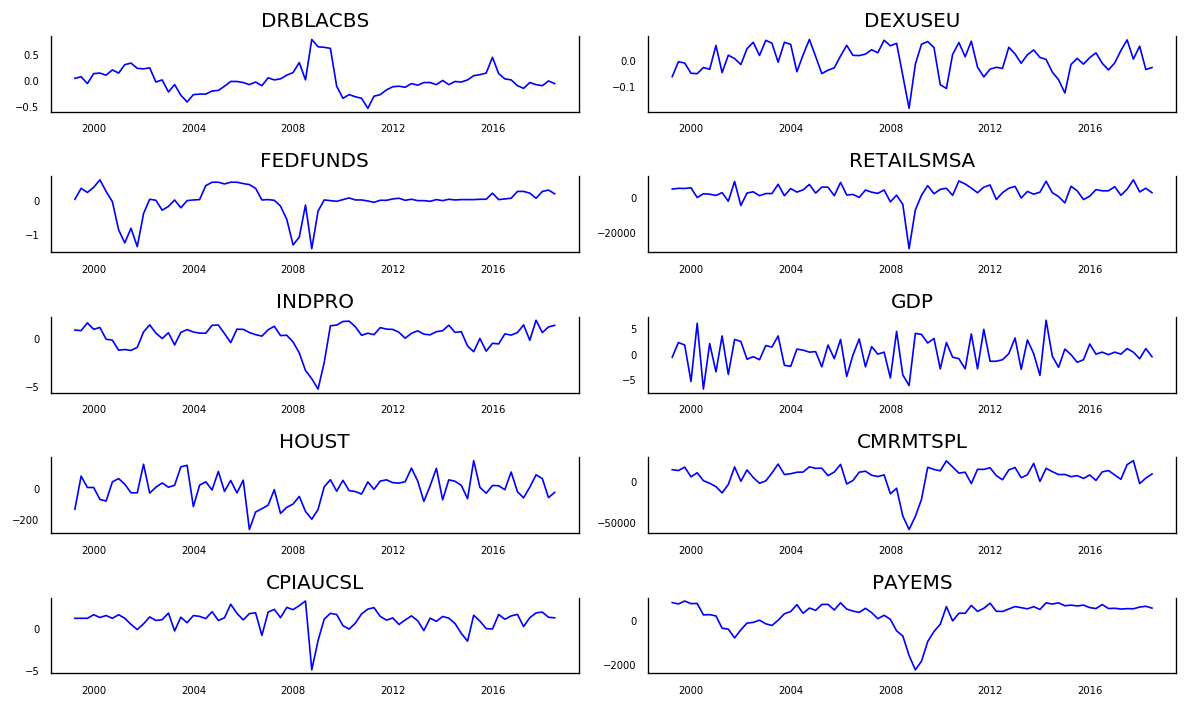

In [19]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
# Plot
fig, axes = plt.subplots(nrows=5, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = dataset_differenced[dataset_differenced.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
# Decorations
    ax.set_title(dataset.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout();

In [20]:
#Select The Order (P) of VAR Model

In [21]:
import statsmodels.tsa.api as smt
from statsmodels.tsa.api import VAR
model = VAR(dataset_differenced)
for i in [1,2,3,4,5]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  38.43191194192218
BIC :  42.44986409367135
FPE :  5.046622076063073e+16
HQIC:  40.03905750502207 

Lag Order = 2
AIC :  38.645518422299254
BIC :  46.40440704193664
FPE :  7.533573517527882e+16
HQIC:  41.7463456131599 

Lag Order = 3
AIC :  38.49800158760906
BIC :  50.05454231377679
FPE :  1.1459748179094824e+17
HQIC:  43.11240139965177 

Lag Order = 4
AIC :  36.72018540321788
BIC :  52.13251271586739
FPE :  7.618273972995174e+16
HQIC:  42.868352256792704 

Lag Order = 5
AIC :  33.78607421088901
BIC :  53.11378675537406
FPE :  1.0597202567665317e+17
HQIC:  41.48850147103494 



C:\Users\Gandy Family\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [22]:
x = model.select_order(maxlags=5)
x.summary()

,AIC,BIC,FPE,HQIC
0,42.18,42.52*,2.074e+18,42.31
1,38.56,42.70,5.764e+16*,40.21*
2,38.81,46.75,9.173e+16,41.98
3,38.57,50.31,1.331e+17,43.25
4,36.72,52.25,8.463e+16,42.90
5,33.79*,53.11,1.060e+17,41.49


In [23]:
#Train The VAR Model of Selected Order (p)

In [24]:
model_fitted = model.fit(5)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 07, Apr, 2020
Time:                     01:46:43
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                    53.1138
Nobs:                     73.0000    HQIC:                   41.4885
Log likelihood:          -1756.60    FPE:                1.05972e+17
AIC:                      33.7861    Det(Omega_mle):     2.01956e+14
--------------------------------------------------------------------
Results for equation DRBLACBS
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.176130         0.122217           -1.441           0.150
L1.DRBLACBS          -0.052368         0.253665           -0.206           0.836
L1.DEXUSEU           -0.326599         0.660423          

In [25]:
#Durbin-Watson Statistic

In [26]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(dataset.columns, out):
    print((col), ':', round(val, 2))

DRBLACBS : 2.12
DEXUSEU : 2.15
FEDFUNDS : 1.83
RETAILSMSA : 1.99
INDPRO : 2.07
GDP : 1.87
HOUST : 2.14
CMRMTSPL : 2.17
CPIAUCSL : 2.29
PAYEMS : 2.07
DGS10 : 2.26


In [27]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #>4

# Input data for forecasting
forecast_input = dataset_differenced.values[-lag_order:]
forecast_input

5


array([[-5.0000000e-02,  7.4700000e-02,  2.0000000e-01,  4.7410000e+03,
        -2.0980000e-01,  1.0000000e+00,  6.0000000e+00,  1.9716333e+04,
         1.3050000e+00,  5.4000000e+02, -2.0000000e-02],
       [-9.0000000e-02,  2.3000000e-03,  5.0000000e-02,  1.0181000e+04,
         1.9057000e+00,  3.0000000e-01,  8.5000000e+01,  2.4610333e+04,
         1.8910000e+00,  5.3300000e+02,  1.3000000e-01],
       [-1.1000000e-01,  5.1100000e-02,  2.5000000e-01,  3.1790000e+03,
         6.0060000e-01, -1.0000000e+00,  6.1000000e+01, -3.4443330e+03,
         1.9850000e+00,  6.1200000e+02,  3.9000000e-01],
       [-2.0000000e-02, -3.6700000e-02,  2.9000000e-01,  5.3150000e+03,
         1.1992000e+00,  1.0000000e+00, -6.1000000e+01,  3.2283330e+03,
         1.3560000e+00,  6.4800000e+02,  1.6000000e-01],
       [-7.0000000e-02, -2.9300000e-02,  1.8000000e-01,  2.7400000e+03,
         1.3648000e+00, -6.0000000e-01, -2.7000000e+01,  8.2986670e+03,
         1.2920000e+00,  5.6400000e+02,  0.0000000e+

In [28]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
dataset_forecast = pd.DataFrame(fc, index=dataset.index[-nobs:], columns=dataset.columns + '_1d')
dataset_forecast

,DRBLACBS_1d,DEXUSEU_1d,FEDFUNDS_1d,RETAILSMSA_1d,INDPRO_1d,GDP_1d,HOUST_1d,CMRMTSPL_1d,CPIAUCSL_1d,PAYEMS_1d,DGS10_1d
Date,,,,,,,,,,,
2018-10-01,-0.103378,0.029207,0.458766,14040.489910,2.330780,3.634782,31.393964,26981.159803,3.452676,560.623713,-0.231014
2019-01-01,-0.351576,0.048390,0.332285,8197.995695,3.687170,0.825764,150.468229,28674.287625,2.685947,717.112979,0.533457
2019-04-01,-0.285905,-0.040651,0.282865,4739.817660,2.163255,-1.585227,28.749201,14850.938296,0.325553,791.548355,0.002883
2019-07-01,-0.198854,-0.043282,-0.179392,-243.830533,0.476103,-3.049909,-77.088862,-4232.589467,0.267270,684.420793,-0.403424
2019-10-01,-0.018529,-0.023228,-0.501372,4540.703715,-0.560585,1.050399,51.283090,4209.546474,1.132542,296.765742,-0.311024


In [29]:
#Invert the Transformation to Get the Real Forecast

In [30]:
def invert_transformation(dataset_train, dataset_forecast, first_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    dataset_fc = dataset_forecast.copy()
    columns=dataset_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        #if second_diff:
            #df_fc[str(col)+'_1d'] = (x_train[col].iloc[-1]-x_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        dataset_fc[str(col)+'_forecast'] = dataset_train[col].iloc[-1] + dataset_fc[str(col)+'_1d'].cumsum()
    return dataset_fc

In [31]:
dataset_results = invert_transformation(dataset_train, dataset_forecast, first_diff=True)        
dataset_results.loc[:, ['DRBLACBS_forecast','DEXUSEU_forecast','FEDFUNDS_forecast','RETAILSMSA_forecast','INDPRO_forecast',
                        'GDP_forecast','HOUST_forecast','CMRMTSPL_forecast','CPIAUCSL_forecast','PAYEMS_forecast','DGS10_forecast']]

,DRBLACBS_forecast,DEXUSEU_forecast,FEDFUNDS_forecast,RETAILSMSA_forecast,INDPRO_forecast,GDP_forecast,HOUST_forecast,CMRMTSPL_forecast,CPIAUCSL_forecast,PAYEMS_forecast,DGS10_forecast
Date,,,,,,,,,,,
2018-10-01,0.896622,1.192107,2.378766,456636.489910,111.614580,6.534782,1264.393964,1.514698e+06,255.335676,149773.623713,2.688986
2019-01-01,0.545046,1.240496,2.711051,464834.485604,115.301750,7.360545,1414.862193,1.543372e+06,258.021623,150490.736692,3.222443
2019-04-01,0.259142,1.199845,2.993917,469574.303264,117.465005,5.775319,1443.611393,1.558223e+06,258.347176,151282.285047,3.225326
2019-07-01,0.060287,1.156563,2.814525,469330.472731,117.941108,2.725410,1366.522531,1.553991e+06,258.614446,151966.705840,2.821902
2019-10-01,0.041758,1.133334,2.313152,473871.176446,117.380524,3.775809,1417.805621,1.558200e+06,259.746988,152263.471582,2.510879


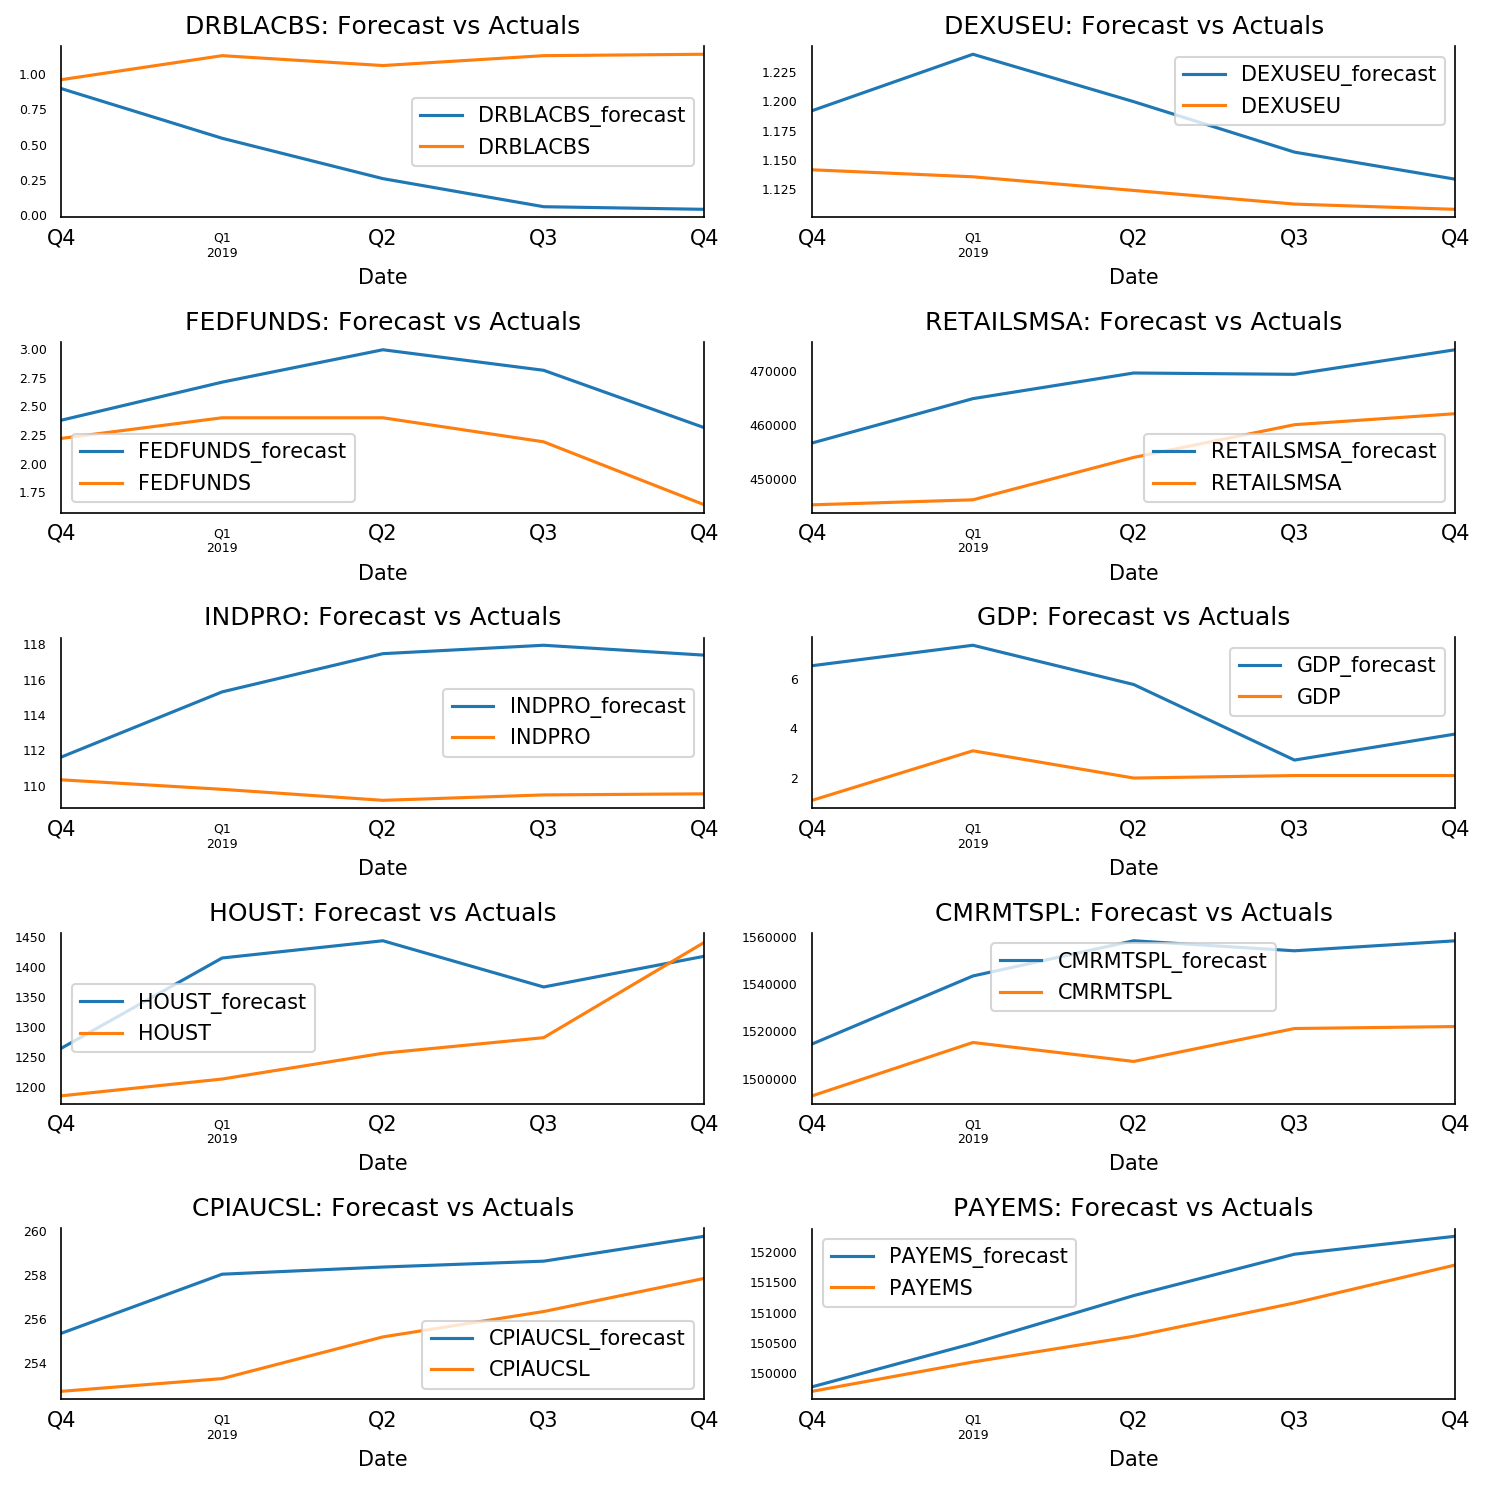

In [32]:
fig, axes = plt.subplots(nrows=int(len(dataset_train.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(dataset_train.columns, axes.flatten())):
    dataset_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    dataset_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [33]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})
def adjust(val, length= 6): return str(val).ljust(length)

#Print Summary
print('Forecast Accuracy of: Delinquency')
accuracy_prod = forecast_accuracy(dataset_results['DRBLACBS_forecast'].values, dataset_test['DRBLACBS'])
for k, v in accuracy_prod.items():
    print(adjust(k), ':', round(v,4))

print('\nForecast Accuracy of: Euro Foreign Exchange Rate')
accuracy_prod = forecast_accuracy(dataset_results['DEXUSEU_forecast'].values, dataset_test['DEXUSEU'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Effective Federal Funds Rate')
accuracy_prod = forecast_accuracy(dataset_results['FEDFUNDS_forecast'].values, dataset_test['FEDFUNDS'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Retailers Sales')
accuracy_prod = forecast_accuracy(dataset_results['RETAILSMSA_forecast'].values, dataset_test['RETAILSMSA'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Industrial Production Index')
accuracy_prod = forecast_accuracy(dataset_results['INDPRO_forecast'].values, dataset_test['INDPRO'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Real Gross Domestic Product')
accuracy_prod = forecast_accuracy(dataset_results['GDP_forecast'].values, dataset_test['GDP'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Housing Starts: Total')
accuracy_prod = forecast_accuracy(dataset_results['HOUST_forecast'].values, dataset_test['HOUST'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Manufacturing')
accuracy_prod = forecast_accuracy(dataset_results['CMRMTSPL_forecast'].values, dataset_test['CMRMTSPL'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
print('\nForecast Accuracy of: Consumer Price Index')
accuracy_prod = forecast_accuracy(dataset_results['CPIAUCSL_forecast'].values, dataset_test['CPIAUCSL'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
print('\nForecast Accuracy of: Total Nonfarm')
accuracy_prod = forecast_accuracy(dataset_results['PAYEMS_forecast'].values, dataset_test['PAYEMS'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
    
print('\nForecast Accuracy of: 10-Year Treasury')
accuracy_prod = forecast_accuracy(dataset_results['DGS10_forecast'].values, dataset_test['DGS10'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Delinquency
mape   : 0.6498
me     : -0.7234
mae    : 0.7234
mpe    : -0.6498
rmse   : 0.8171
corr   : -0.7894
minmax : 0.6498

Forecast Accuracy of: Euro Foreign Exchange Rate
mape   :  0.0536
me     :  0.0605
mae    :  0.0605
mpe    :  0.0536
rmse   :  0.0664
corr   :  0.8081
minmax :  0.0504

Forecast Accuracy of: Effective Federal Funds Rate
mape   :  0.2288
me     :  0.4723
mae    :  0.4723
mpe    :  0.2288
rmse   :  0.5134
corr   :  0.7227
minmax :  0.1786

Forecast Accuracy of: Retailers Sales
mape   :  0.0296
me     :  13372.1856
mae    :  13372.1856
mpe    :  0.0296
rmse   :  13784.8978
corr   :  0.8753
minmax :  0.0287

Forecast Accuracy of: Industrial Production Index
mape   :  0.0574
me     :  6.2848
mae    :  6.2848
mpe    :  0.0574
rmse   :  6.8458
corr   :  -0.9374
minmax :  0.0537

Forecast Accuracy of: Real Gross Domestic Product
mape   :  1.8597
me     :  3.1544
mae    :  3.1544
mpe    :  1.8597
rmse   :  3.6095
corr   :  0.141
minmax :  0.5475

